In [1]:
!pwd

/home/tesla/tigers_bbox/final_detector/Detector


In [ ]:
!ls

In [2]:
import sys
import cv2

sys.path.insert(0, '/home/tesla/tigers_bbox/final_detector/Detector/yolov5')
import Detector

det = Detector.YoloDetector(weights='./best1.pt', img_size=480, conf_thres=0.4, iou_thres=0.4)

def detector_process_file(image_file):
    
    try:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    except Exception:
        print("err with : " + image_file)
        return []
        
    bboxes = det.detect(img_rgb)
    return bboxes


/home/tesla/env/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Что делаем?

1. собираем фото в отдельный каталог, проверяем - jpg или jpeg

2. задаём каталог FILES_PATH

3. запускаем, на выходе labels.csv

4. есть простая проверка CSV

In [3]:
import glob, os
from tqdm import tqdm

preds = []

# check if jpg of jpeg

FILES_PATH = "/home/tesla/TigVsLeo/*.jpg"


for py in tqdm(glob.glob(FILES_PATH)):
    
    result = detector_process_file(py)
    
    # id – название изображения внутри архива
    # class – класс объекта:
    # 1 - Тигр
    # 2 - Леопард
    # 3 - Нет тигра и нет леопарда
    
    
    if len(result) == 0:
        result_class = 3 # there are no animals
        
    else:
        if int(result[0][-1]) == 0:
            result_class = 2 # leopard
        else:
            result_class = 1 # tiger    
    
    preds.append("\n" + os.path.basename(py) + ',' + str(result_class))
    #print(py)
    

with open('labels.csv', 'w') as out:
    out.write("id,class")
    out.writelines(preds)

    


100%|██████████| 1068/1068 [00:50<00:00, 21.33it/s]


In [4]:
########################
### check
#######################


import pandas as pd

    # 1 - Тигр
    # 2 - Леопард
    # 3 - Нет тигра и нет леопарда

labels = pd.read_csv('labels.csv')

labels['class'].value_counts()

3    879
2    100
1     89
Name: class, dtype: int64

Populating the interactive namespace from numpy and matplotlib
1   c653663312527454.jpg


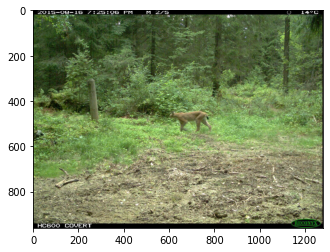

11   c407957397917942.jpg


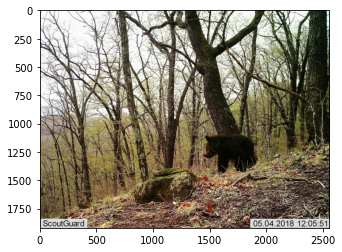

21   c642824379780892.jpg


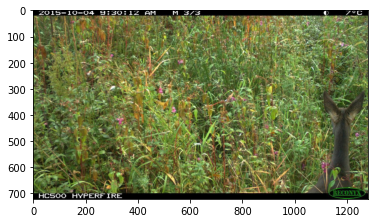

31   c947006861037628.jpg


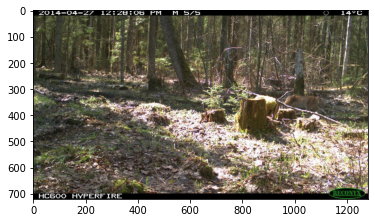

41   c31074339903880.jpg


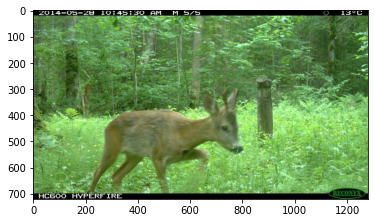

51   c237742066762175.jpg


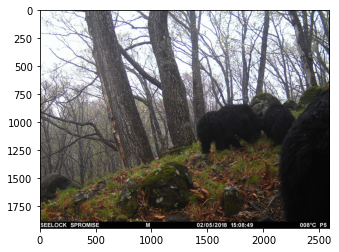

61   c321434257414310.jpg


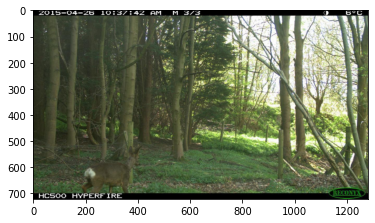

71   c638601370397804.jpg


KeyboardInterrupt: 

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

empty_files = labels[labels['class'] == 3]['id']

for i,f in enumerate(empty_files):
    if i%10 == 1:
        print(i," ", f)
        img = mpimg.imread('/home/tesla/TigVsLeo/'+f)
        imgplot = plt.imshow(img)
        plt.show()